<a href="https://colab.research.google.com/github/anabiaboorges/lia1_2024_2/blob/main/Entregas%20-%20Ana%20Beatriz%20Borges%5CDogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


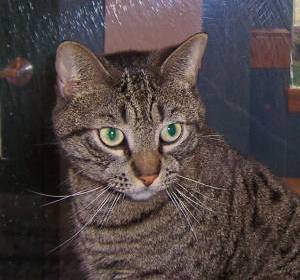

In [6]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/infos/cats/cat.1.jpg')

In [7]:
import tensorflow as tf

In [8]:
import keras as K

In [9]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [11]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/infos',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1010 images belonging to 2 classes.


In [14]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.5284 - loss: 0.6960
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7014 - loss: 0.6239
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7114 - loss: 0.6089
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6872 - loss: 0.6348
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7736 - loss: 0.5362
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6673 - loss: 0.6258
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.6085 
Epoch 8/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6911 - loss: 0.6115
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 0.8172 - loss: 0.4805
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 638ms/step - accuracy: 0.7580 - loss: 0.5495
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7076 - loss: 0.6021
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.7484 - loss: 0.5381
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6609 - loss: 0.6450
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6687 - loss: 0.6325 
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 772ms/step - accuracy: 0.7668 - loss: 0.5718
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.7566 - loss: 0.5835
Epoch 17/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 790ms/step - accuracy: 0.7161 - loss: 0.5642
Epoch 18/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7046 - loss: 0.6481
Epoch 19/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - accuracy: 0.7068 - loss: 0.5704


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Previsão: Cachorro
Acurácia: 0.0 %.


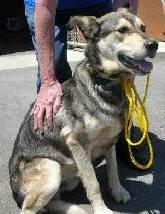

In [32]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/test1/10108.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] <= 0.5:
    prediction = 'Cachorro'
    accuracy = round(result[0][0] * 100, 2)
else:
    prediction = 'Gato'
    accuracy = round((1 - result[0][0]) * 100, 2)


# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/test1/10108.jpg')
